# testing training dataset of project

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [120]:
data= pd.read_csv(r"C:\Users\Amit Sahani\Desktop\training and testing.csv")

In [121]:
data.head()

,Gender,Age,Education,Occupation,Number of family members,location,Income,medi,hi,hospital preference
0,0,45,4,5,4,2,3,0,0,1
1,1,56,2,7,6,2,3,0,0,0
2,1,22,5,3,3,2,4,0,0,1
3,0,22,5,3,4,4,3,1,1,1
4,1,22,5,3,4,2,4,0,0,1


In [122]:
print(data.shape)

(328, 10)


In [123]:
print(list(data.columns))

['Gender', 'Age', 'Education ', 'Occupation ', 'Number of family members', 'location', 'Income ', 'medi', 'hi', 'hospital preference']


In [124]:
data.dtypes

Gender                      int64
Age                         int64
Education                   int64
Occupation                  int64
Number of family members    int64
location                    int64
Income                      int64
medi                        int64
hi                          int64
hospital preference         int64
dtype: object

In [125]:
###converting dtypes using astype

In [126]:
data["Gender"]=data["Gender"].astype("category")

In [127]:
data["Education "]=data["Education "].astype('category')
data["Occupation "]=data["Occupation "].astype('category')
data["location"]=data["location"].astype('category')
data["Income "]=data["Income "].astype('category')
data["medi"]=data["medi"].astype('category')
data["hi"]=data["hi"].astype('category')
data["hospital preference"]=data["hospital preference"].astype('category')

In [128]:
data["Gender"].value_counts()

0    166
1    162
Name: Gender, dtype: int64

In [129]:

data.dtypes
#X=data.iloc[:,:-1].values
#y=data.iloc[:,-1].values

Gender                      category
Age                            int64
Education                   category
Occupation                  category
Number of family members       int64
location                    category
Income                      category
medi                        category
hi                          category
hospital preference         category
dtype: object

In [132]:
X=data[['Gender', 'Age', 'Education ', 'Occupation ', 'Number of family members', 'location', 'Income ', 'medi', 'hi']]
y=data ['hospital preference']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [134]:
##fit a model on train data
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

In [135]:
predictions=model.predict(X_test)   #y_pred=model.predict(X_test)            ###predicting on test dataset

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [139]:
model.score(X_train,y_train)   ###accuracy score for train set 

0.9956331877729258

In [140]:
model.score(X_test,y_test)    ####same as accuracy score for the test set

0.8686868686868687

In [141]:
confusion_matrix(y_test, y_pred)

array([[19,  3],
       [10, 67]], dtype=int64)

In [142]:
confusion_matrix(y_test, predictions)

array([[19,  3],
       [10, 67]], dtype=int64)

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75        22
           1       0.96      0.87      0.91        77

    accuracy                           0.87        99
   macro avg       0.81      0.87      0.83        99
weighted avg       0.89      0.87      0.87        99



In [144]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8686868686868687
Precision: 0.9571428571428572
Recall: 0.8701298701298701


In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8686868686868687

In [192]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred,average="macro")

0.8668831168831169

In [199]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
roc_auc = roc_auc_score(y_test, model.predict(X_test))
roc_auc

0.8668831168831169

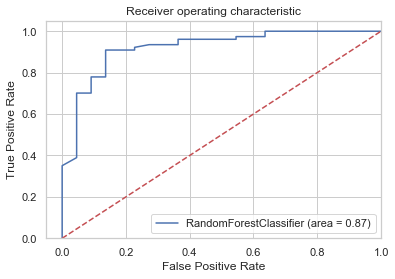

In [201]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# again

In [213]:
probs = model.predict_proba(X_test)


In [214]:
probs = probs[:, 1]

In [181]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)


AUC: 0.92


In [182]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

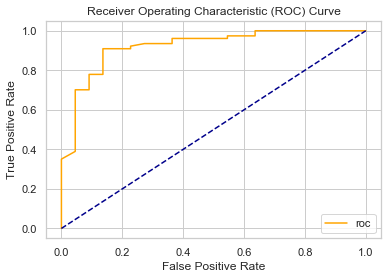

In [183]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='roc')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc_curve(fpr, tpr)

In [173]:
y_pred=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8686868686868687


In [184]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)
roc_auc = roc_auc_score(y_test, model.predict(X_test))


In [187]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


AUC: 0.92


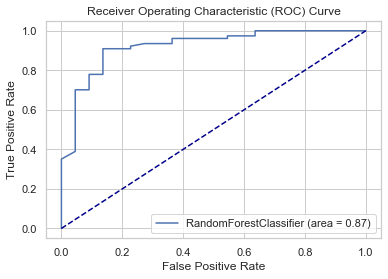

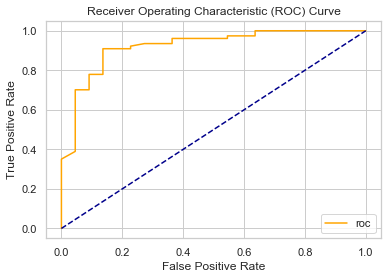

In [210]:
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
print('AUC: %.2f' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plot_roc_curve(fpr, tpr)

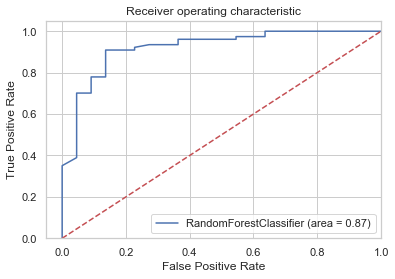

AUC: 0.92


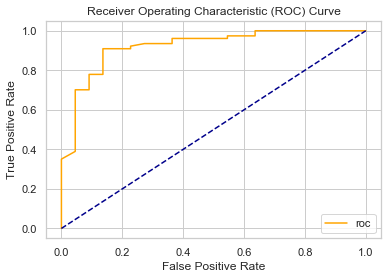

In [215]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()


probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='roc')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc_curve(fpr, tpr)